In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\train.csv")
# test_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\test.csv")
holiday_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\holidays_events.csv")
oil_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\oil.csv")
stores_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\stores.csv")
transaction_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\transactions.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [4]:
train_df.date = pd.to_datetime(train_df.date)

In [5]:
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [9]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [13]:
train_df.date = pd.to_datetime(train_df.date)
holiday_df.date = pd.to_datetime(holiday_df.date)
oil_df.date = pd.to_datetime(oil_df.date)
transaction_df.date = pd.to_datetime(transaction_df.date)

In [14]:
train_df = train_df.merge(holiday_df, on='date', how='left')

In [15]:
train_df = train_df.merge(oil_df, on='date', how='left')

In [16]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   type         object        
 7   locale       object        
 8   locale_name  object        
 9   description  object        
 10  transferred  object        
 11  dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 279.6+ MB


In [18]:
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [19]:
transaction_df.shape

(83488, 3)

In [20]:
train_df.shape

(3054348, 12)

Merg all the dataset together

In [21]:
train_df = train_df.merge(stores_df, on='store_nbr', how='left')

In [22]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [23]:
train_df.isna().sum()/train_df.shape[0]*100

id              0.000000
date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
type_x         83.547258
locale         83.547258
locale_name    83.547258
description    83.547258
transferred    83.547258
dcoilwtico     31.271879
city            0.000000
state           0.000000
type_y          0.000000
cluster         0.000000
dtype: float64

In [24]:
train_df.locale_name.value_counts()

locale_name
Ecuador                           261954
Guayaquil                          19602
Riobamba                           17820
Guaranda                           16038
Latacunga                          16038
Quito                              14256
Ambato                             14256
Cuenca                             10692
Manta                               8910
Esmeraldas                          8910
Cayambe                             8910
Santo Domingo                       8910
El Carmen                           8910
Machala                             8910
Imbabura                            8910
Puyo                                8910
Libertad                            8910
Cotopaxi                            8910
Ibarra                              7128
Quevedo                             7128
Santo Domingo de los Tsachilas      7128
Santa Elena                         7128
Loja                                7128
Salinas                             7128
Name

In [25]:
train_df.description.value_counts()

description
Carnaval                       17820
Fundacion de Cuenca            10692
Primer dia del ano              8910
Cantonizacion de Guaranda       8910
Fundacion de Riobamba           8910
                               ...  
Terremoto Manabi+6              1782
Terremoto Manabi+7              1782
Terremoto Manabi+8              1782
Terremoto Manabi+9              1782
Traslado Primer dia del ano     1782
Name: count, Length: 101, dtype: int64

In [26]:
train_df.transferred.value_counts()

transferred
False    486486
True      16038
Name: count, dtype: int64

In [27]:
# these column has no use in any analysis so
col_to_drop = ['transferred', 'description', 'locale_name', 'id']

In [28]:
train_df.drop(col_to_drop, axis=1, inplace=True)

In [29]:
train_df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,NaN,Quito,Pichincha,D,13


In [30]:
train_df.isna().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
type_x         2551824
locale         2551824
dcoilwtico      955152
city                 0
state                0
type_y               0
cluster              0
dtype: int64

In [31]:
train_df.locale.value_counts()

locale
National    261954
Local       208494
Regional     32076
Name: count, dtype: int64

In [32]:
train_df.type_x.value_counts()

type_x
Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

In [33]:
train_df.locale = train_df.locale.fillna('Workday')

In [34]:
train_df.type_x = train_df.type_x.fillna('Work Day')

In [35]:
train_df.dcoilwtico.fillna(train_df.dcoilwtico.mean(), inplace=True)

In [36]:
train_df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13


In [37]:
df = train_df.copy(deep=True)

In [38]:
# df = train_df

In [39]:
# Extract features
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # Flag weekends

# Check if December (for seasonal trend analysis)
df['is_december'] = (df['month'] == 12).astype(int)

In [40]:
df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,dcoilwtico,city,state,type_y,cluster,day,week,month,year,day_of_week,is_weekend,is_december
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13,1,1,1,2013,1,0,0
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13,1,1,1,2013,1,0,0
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13,1,1,1,2013,1,0,0
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13,1,1,1,2013,1,0,0
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13,1,1,1,2013,1,0,0


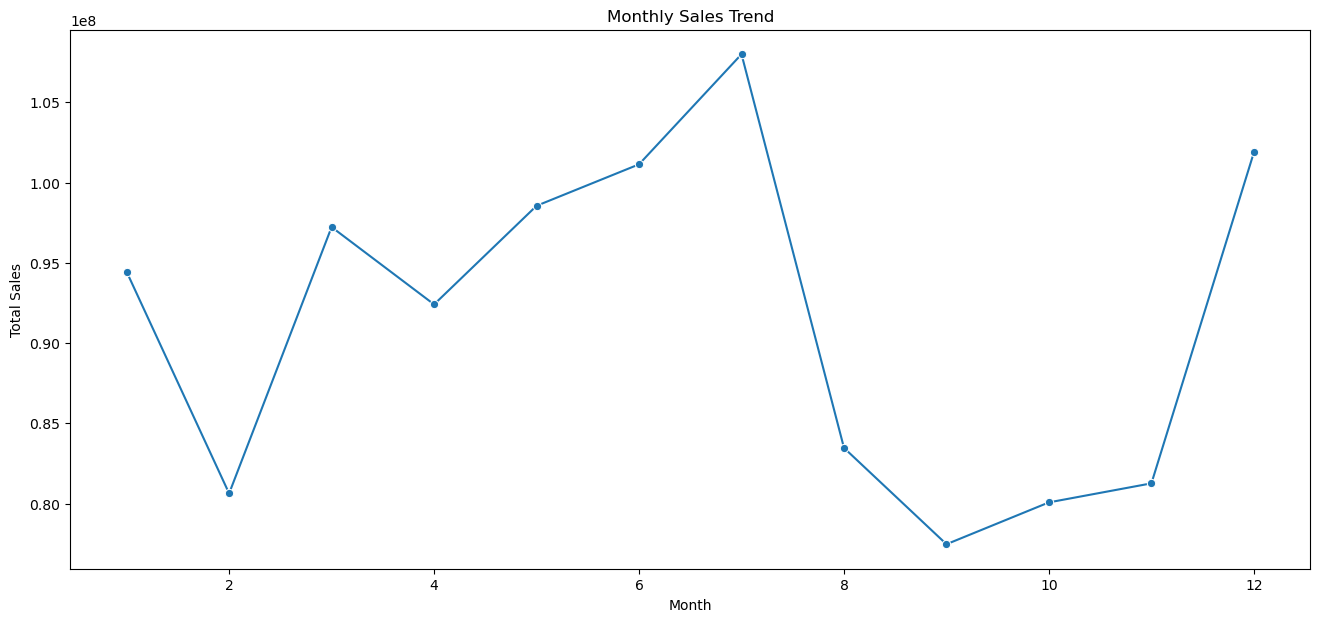

In [41]:
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
plt.figure(figsize=(16,7))
sns.lineplot(x='month', y='sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [42]:
# Flag for holidays
df['is_holiday'] = df['type_x'].apply(lambda x: 1 if x == 'Holiday' else 0)

# Flag for promotions
df['has_promotion'] = (df['onpromotion'] > 0).astype(int)

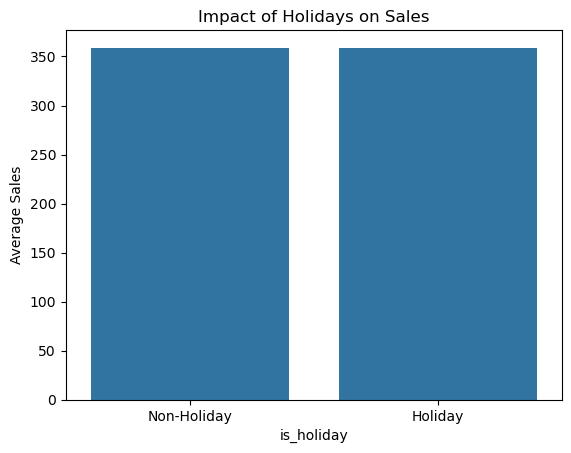

In [43]:
holiday_sales = df.groupby('is_holiday')['sales'].mean()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.ylabel("Average Sales")
plt.title("Impact of Holidays on Sales")
plt.show()


In [44]:
df['sales_7d_avg'] = df['sales'].rolling(window=7, min_periods=1).mean()  # 7-day moving average
df['sales_30d_avg'] = df['sales'].rolling(window=30, min_periods=1).mean()  # 30-day moving average

# Lag features (sales from the previous day, week, and month)
df['sales_lag_1d'] = df['sales'].shift(1)
df['sales_lag_7d'] = df['sales'].shift(7)
df['sales_lag_30d'] = df['sales'].shift(30)

print(df[['date', 'sales', 'sales_7d_avg', 'sales_lag_7d']].head(15))


         date  sales  sales_7d_avg  sales_lag_7d
0  2013-01-01    0.0           0.0           NaN
1  2013-01-01    0.0           0.0           NaN
2  2013-01-01    0.0           0.0           NaN
3  2013-01-01    0.0           0.0           NaN
4  2013-01-01    0.0           0.0           NaN
5  2013-01-01    0.0           0.0           NaN
6  2013-01-01    0.0           0.0           NaN
7  2013-01-01    0.0           0.0           0.0
8  2013-01-01    0.0           0.0           0.0
9  2013-01-01    0.0           0.0           0.0
10 2013-01-01    0.0           0.0           0.0
11 2013-01-01    0.0           0.0           0.0
12 2013-01-01    0.0           0.0           0.0
13 2013-01-01    0.0           0.0           0.0
14 2013-01-01    0.0           0.0           0.0


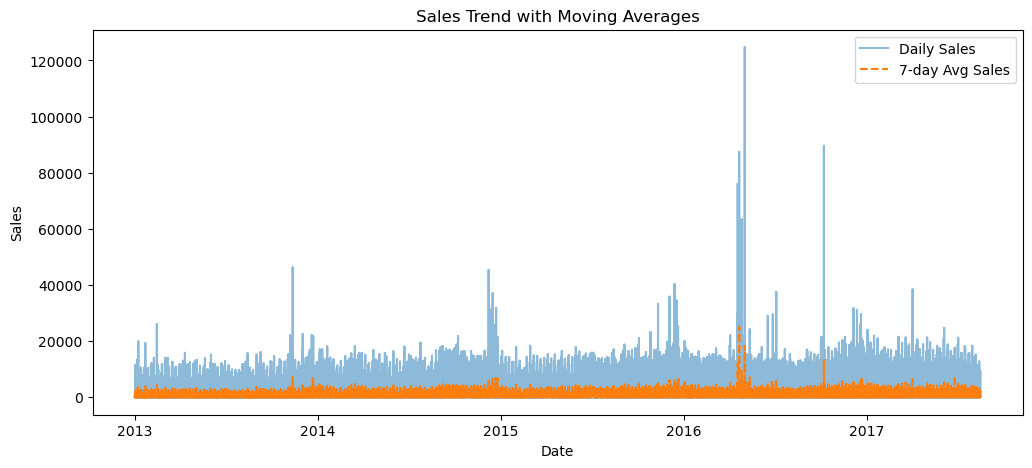

In [45]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['sales'], label='Daily Sales', alpha=0.5)
plt.plot(df['date'], df['sales_7d_avg'], label='7-day Avg Sales', linestyle='dashed')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend with Moving Averages")
plt.show()


In [46]:
# Average sales per store type
store_avg_sales = df.groupby('type_y')['sales'].mean().reset_index()
print(store_avg_sales)

# Top-selling product families per cluster
top_families = df.groupby(['cluster', 'family'])['sales'].sum().reset_index()
top_families = top_families.sort_values(['cluster', 'sales'], ascending=[True, False]).groupby('cluster').head(3)

print(top_families)


  type_y       sales
0      A  708.378165
1      B  328.275233
2      C  197.790647
3      D  352.084510
4      E  270.285490
     cluster     family         sales
12         1  GROCERY I  1.483284e+07
3          1  BEVERAGES  1.201252e+07
30         1    PRODUCE  8.221406e+06
45         2  GROCERY I  8.649030e+06
36         2  BEVERAGES  5.503139e+06
63         2    PRODUCE  5.068959e+06
78         3  GROCERY I  2.978610e+07
69         3  BEVERAGES  1.495938e+07
73         3   CLEANING  1.010321e+07
111        4  GROCERY I  1.682519e+07
102        4  BEVERAGES  8.343193e+06
129        4    PRODUCE  6.143160e+06
144        5  GROCERY I  1.671595e+07
135        5  BEVERAGES  1.369617e+07
162        5    PRODUCE  1.089640e+07
177        6  GROCERY I  4.397177e+07
168        6  BEVERAGES  2.362880e+07
172        6   CLEANING  1.227164e+07
210        7  GROCERY I  6.163853e+06
201        7  BEVERAGES  2.536783e+06
205        7   CLEANING  2.295478e+06
243        8  GROCERY I  2.768491e+07


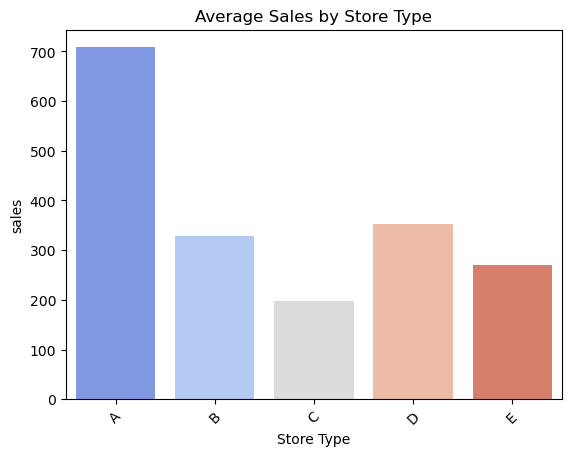

In [47]:
sns.barplot(x='type_y', y='sales', data=store_avg_sales, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Store Type')
plt.title("Average Sales by Store Type")
plt.show()


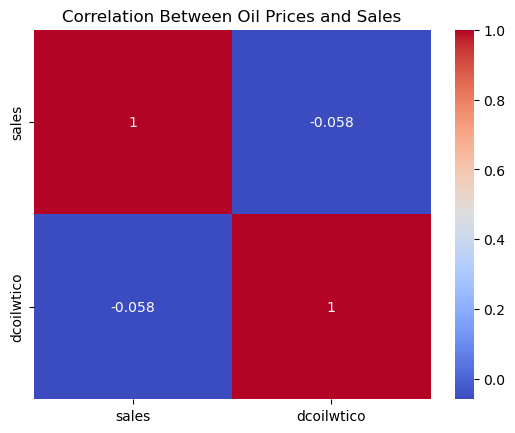

In [48]:
correlation = df[['sales', 'dcoilwtico']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Oil Prices and Sales")
plt.show()

In [49]:
from scipy.stats import zscore

df['sales_zscore'] = np.abs(zscore(df['sales']))

# Identify anomalies (Z-score > 3)
anomalies = df[df['sales_zscore'] > 3]
print(anomalies)


              date  store_nbr     family     sales  onpromotion    type_x  \
1860    2013-01-02         11  GROCERY I  7736.000            0  Work Day   
2091    2013-01-02         18  GROCERY I  3756.000            0  Work Day   
2157    2013-01-02          2  GROCERY I  3870.000            0  Work Day   
2322    2013-01-02         24  GROCERY I  3920.000            0  Work Day   
2511    2013-01-02          3  BEVERAGES  4486.000            0  Work Day   
...            ...        ...        ...       ...          ...       ...   
3054252 2017-08-15          7  BEVERAGES  3999.000            9   Holiday   
3054279 2017-08-15          7    PRODUCE  5113.961            6   Holiday   
3054294 2017-08-15          8  GROCERY I  4035.000           34   Holiday   
3054312 2017-08-15          8    PRODUCE  3939.392           10   Holiday   
3054327 2017-08-15          9  GROCERY I  6630.383           62   Holiday   

          locale  dcoilwtico       city      state  ... is_weekend  \
1860 

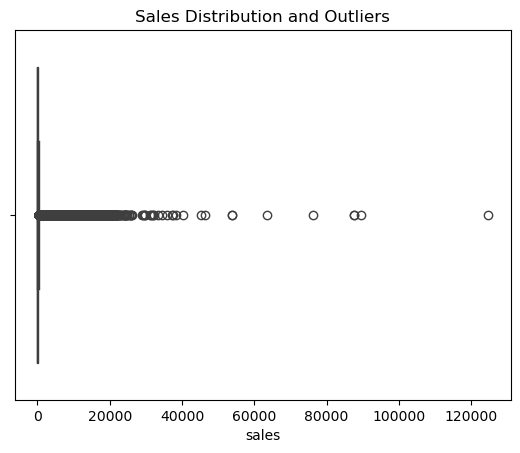

In [50]:
sns.boxplot(x=df['sales'])
plt.title("Sales Distribution and Outliers")
plt.show()

In [51]:
df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,dcoilwtico,city,state,...,is_weekend,is_december,is_holiday,has_promotion,sales_7d_avg,sales_30d_avg,sales_lag_1d,sales_lag_7d,sales_lag_30d,sales_zscore
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,...,0,0,1,0,0.0,0.0,NaN,NaN,NaN,0.324235
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,...,0,0,1,0,0.0,0.0,0.0,NaN,NaN,0.324235
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,68.015874,Quito,Pichincha,...,0,0,1,0,0.0,0.0,0.0,NaN,NaN,0.324235
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,68.015874,Quito,Pichincha,...,0,0,1,0,0.0,0.0,0.0,NaN,NaN,0.324235
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,68.015874,Quito,Pichincha,...,0,0,1,0,0.0,0.0,0.0,NaN,NaN,0.324235


In [52]:
train_df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
 5   type_x       object        
 6   locale       object        
 7   dcoilwtico   float64       
 8   city         object        
 9   state        object        
 10  type_y       object        
 11  cluster      int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 279.6+ MB


In [54]:
train_df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,68.015874,Quito,Pichincha,D,13


In [55]:
train_df.drop(columns=['type_x', 'locale'], axis=1, inplace=True)

In [56]:
train_df.drop(columns=['city', 'state'], axis=1, inplace=True)

In [57]:
# , 'city', 'state'

In [58]:
train_df = pd.get_dummies(train_df, columns=['family', 'type_y'], drop_first=True)

In [59]:
train_df = train_df.replace(False, 0).replace(True, 1)

In [60]:
df = train_df.copy(deep=True)

In [61]:
df.head()

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_y_B,type_y_C,type_y_D,type_y_E
0,2013-01-01,1,0.0,0,68.015874,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013-01-01,1,0.0,0,68.015874,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2013-01-01,1,0.0,0,68.015874,13,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2013-01-01,1,0.0,0,68.015874,13,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2013-01-01,1,0.0,0,68.015874,13,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [62]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # Convert to percentage
    r2 = r2_score(y_true, y_pred)
    
    print(f"📊 {model_name} Evaluation Metrics:")
    print(f"✅ RMSE: {rmse:.2f}")
    print(f"✅ MAPE: {mape:.2f}%")
    print(f"✅ R² Score: {r2:.4f}")

# Modeling

## ARIMA

In [65]:
df1 = pd.DataFrame()

In [66]:
df1['date'] = df['date']
df1['sales'] = df['sales']

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   sales   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.6 MB


In [68]:
df1.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


In [69]:
# df1 = df1.groupby('date')['sales'].sum()
df1 = df1.groupby('date', as_index=False)['sales'].mean()

In [70]:
df1.set_index('date', inplace=True)

In [71]:
df1 = df1.asfreq('D') 

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [73]:
# Fit ARIMA Model
model_arima = ARIMA(df1['sales'], order=(1, 1, 1))  # (p=1, d=1, q=1) as an example
model_arima_fit = model_arima.fit()

In [74]:
# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Evaluate Model
mae_arima = mean_absolute_error(df['sales'][-30:], forecast_arima)
print(f'ARIMA MAE: {mae_arima}')

ARIMA MAE: 696.4626693552908


In [75]:
evaluate_model(df['sales'][-30:], forecast_arima, 'ARIMA')

📊 ARIMA Evaluation Metrics:
✅ RMSE: 1363.80
✅ MAPE: 13989678581015175168.00%
✅ R² Score: -0.0143


## Naïve Forecasting

In [77]:
df2 = pd.DataFrame()

In [78]:
df2 = df1.copy(deep=True)

In [79]:
df2.head()

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244


In [80]:
df2['naive_forecast'] = df2['sales'].shift(1)  # Previous day's sales as forecast
df2.dropna(inplace=True)

from sklearn.metrics import mean_absolute_error

mae_naive = mean_absolute_error(df2['sales'], df2['naive_forecast'])
print(f'Naïve Forecasting MAE: {mae_naive}')


Naïve Forecasting MAE: 65.2303977608606


In [81]:
evaluate_model(df2['sales'], df2['naive_forecast'], 'Naive')

📊 Naive Evaluation Metrics:
✅ RMSE: 89.72
✅ MAPE: 33.80%
✅ R² Score: 0.5321


## Random Forest Regressor

In [83]:
df3 = pd.DataFrame()

In [84]:
df3 = train_df.copy(deep=True)

In [85]:
df3.head()

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_y_B,type_y_C,type_y_D,type_y_E
0,2013-01-01,1,0.0,0,68.015874,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013-01-01,1,0.0,0,68.015874,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2013-01-01,1,0.0,0,68.015874,13,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2013-01-01,1,0.0,0,68.015874,13,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2013-01-01,1,0.0,0,68.015874,13,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [86]:
df3['day'] = df3['date'].dt.day
df3['month'] = df3['date'].dt.month
df3['year'] = df3['date'].dt.year

In [87]:
df3.head()

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_y_B,type_y_C,type_y_D,type_y_E,day,month,year
0,2013-01-01,1,0.0,0,68.015874,13,0,0,0,0,...,0,0,0,0,0,1,0,1,1,2013
1,2013-01-01,1,0.0,0,68.015874,13,1,0,0,0,...,0,0,0,0,0,1,0,1,1,2013
2,2013-01-01,1,0.0,0,68.015874,13,0,1,0,0,...,0,0,0,0,0,1,0,1,1,2013
3,2013-01-01,1,0.0,0,68.015874,13,0,0,1,0,...,0,0,0,0,0,1,0,1,1,2013
4,2013-01-01,1,0.0,0,68.015874,13,0,0,0,1,...,0,0,0,0,0,1,0,1,1,2013


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [89]:
# Prepare features (e.g., lagged sales)
df3['lag_1'] = df3['sales'].shift(1)
df3.dropna(inplace=True)

In [90]:
X = df3[['lag_1']]
y = df3['sales']

In [91]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [92]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
# Predict
rf_predictions = rf_model.predict(X_test)

In [94]:
# Evaluate Model
mae_rf = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest MAE: {mae_rf}')

Random Forest MAE: 607.7735288126071


In [95]:
evaluate_model(y_test, rf_predictions, 'Random Forest Regressor')

📊 Random Forest Regressor Evaluation Metrics:
✅ RMSE: 1428.32
✅ MAPE: 23654494912024838144.00%
✅ R² Score: -0.0943


## XGBoost 

In [97]:
!pip install xgboost

In [98]:
import xgboost as xgb

In [99]:
# Prepare Features
X = df3[['lag_1']]
y = df3['sales']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [101]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [102]:
# Predict
xgb_predictions = xgb_model.predict(X_test)

In [103]:
# Evaluate
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost MAE: {mae_xgb}')

XGBoost MAE: 608.3722524576023


In [104]:
evaluate_model(y_test, xgb_predictions, 'XGBoost')

📊 XGBoost Evaluation Metrics:
✅ RMSE: 1355.73
✅ MAPE: 24481196933078691840.00%
✅ R² Score: 0.0141


## LSTM 

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [107]:
# Reshape data for LSTM input
X = np.array(df3['lag_1']).reshape(-1, 1, 1)  # [samples, timesteps, features]
y = np.array(df3['sales'])

In [108]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [109]:
# Define LSTM Model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

In [110]:
# Train Model
# model_lstm.fit(X_train, y_train, epochs=10, verbose=1)

In [111]:
# Predict
lstm_predictions = model_lstm.predict(X_test)

19090/19090 ━━━━━━━━━━━━━━━━━━━━ 17s 862us/step


In [112]:
# Evaluate
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
print(f'LSTM MAE: {mae_lstm}')

LSTM MAE: 477.9594949632505


In [113]:
evaluate_model(y_test, lstm_predictions, 'LSTM')

📊 LSTM Evaluation Metrics:
✅ RMSE: 1444.96
✅ MAPE: 646907892095513856.00%
✅ R² Score: -0.1199


Accordin to all the models the final model is XGBOOST

# Test

In [116]:
test_df = pd.read_csv(r"C:\Users\Yash\Desktop\CodeBase\W Beyond\store_forecasting_data (1)\store_forecasting_data\test.csv")

In [117]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


Merging all the dataset to test data

In [119]:
test_df.date = pd.to_datetime(test_df.date)

In [120]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [121]:
test_df = test_df.merge(holiday_df, on='date', how='left')
test_df = test_df.merge(oil_df, on='date', how='left')
test_df = test_df.merge(stores_df, on='store_nbr', how='left')

In [122]:
test_df.head()

,id,date,store_nbr,family,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13


In [123]:
test_df.isna().sum()/test_df.shape[0]*100

id              0.00
date            0.00
store_nbr       0.00
family          0.00
onpromotion     0.00
type_x         93.75
locale         93.75
locale_name    93.75
description    93.75
transferred    93.75
dcoilwtico     25.00
city            0.00
state           0.00
type_y          0.00
cluster         0.00
dtype: float64

In [124]:
col_to_drop.remove('id')

In [125]:
col_to_drop

['transferred', 'description', 'locale_name']

In [126]:
test_df.drop(columns=col_to_drop, axis=1, inplace=True)

In [127]:
test_df.drop(columns=['type_x', 'locale', 'city', 'state'], axis=1, inplace=True)

In [128]:
test_df.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,type_y,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,D,13
1,3000889,2017-08-16,1,BABY CARE,0,46.8,D,13
2,3000890,2017-08-16,1,BEAUTY,2,46.8,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,D,13
4,3000892,2017-08-16,1,BOOKS,0,46.8,D,13


In [129]:
test_df = pd.get_dummies(test_df, columns=['family', 'type_y'], drop_first=True)

In [130]:
test_df['day'] = test_df['date'].dt.day
test_df['month'] = test_df['date'].dt.month
test_df['year'] = test_df['date'].dt.year

In [131]:
test_df = test_df.replace(False, 0).replace(True, 1)

In [132]:
test_df.isna().sum()

id                                      0
date                                    0
store_nbr                               0
onpromotion                             0
dcoilwtico                           7128
cluster                                 0
family_BABY CARE                        0
family_BEAUTY                           0
family_BEVERAGES                        0
family_BOOKS                            0
family_BREAD/BAKERY                     0
family_CELEBRATION                      0
family_CLEANING                         0
family_DAIRY                            0
family_DELI                             0
family_EGGS                             0
family_FROZEN FOODS                     0
family_GROCERY I                        0
family_GROCERY II                       0
family_HARDWARE                         0
family_HOME AND KITCHEN I               0
family_HOME AND KITCHEN II              0
family_HOME APPLIANCES                  0
family_HOME CARE                  

In [133]:
test_df.dcoilwtico = test_df.dcoilwtico.fillna(test_df.dcoilwtico.mean())

In [134]:
train_df.head()

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_y_B,type_y_C,type_y_D,type_y_E
0,2013-01-01,1,0.0,0,68.015874,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013-01-01,1,0.0,0,68.015874,13,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2013-01-01,1,0.0,0,68.015874,13,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2013-01-01,1,0.0,0,68.015874,13,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2013-01-01,1,0.0,0,68.015874,13,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [135]:
data = pd.DataFrame()
data['date'] = df3['date']
data['sales'] = df3['sales']

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3054347 entries, 1 to 3054347
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   sales   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.9 MB


In [137]:
data.head()

,date,sales
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0
5,2013-01-01,0.0


In [138]:
data = data.groupby('date', as_index=False)['sales'].mean()

In [139]:
data.head()

,date,sales
0,2013-01-01,1.410230
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244


In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
data.set_index('date', inplace=True)

In [142]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['sales'] = scaler.fit_transform(data[['sales']])

In [143]:
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i : i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [144]:
time_steps = 5  # Use past 5 days to predict next day
X, y = create_sequences(data['sales'].values, time_steps)

In [145]:
# Reshape for LSTM (Samples, Time Steps, Features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [146]:
# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [147]:
# Define LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)  # Output layer
])

In [148]:
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0989
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112
Epoch 12/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102
Epoch 13/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103
Epoch 14/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099
Epoch 15/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 16/20
84/84 ━

In [149]:
# Predict on test data
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [150]:
# Inverse Transform Predictions
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

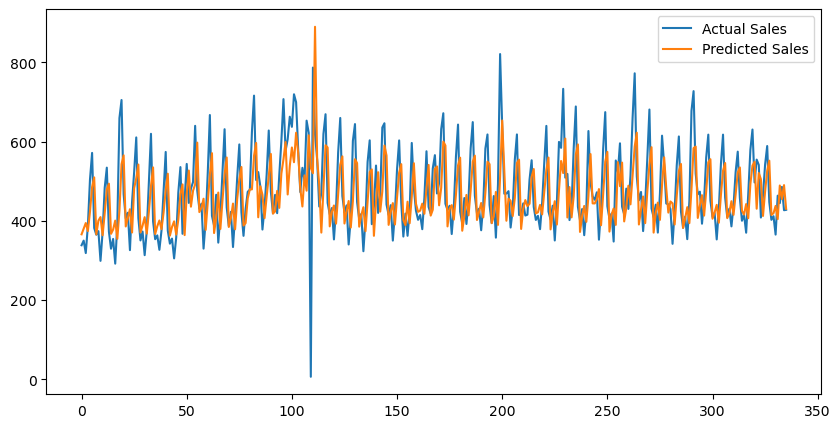

In [151]:
# Plot Actual vs. Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label="Actual Sales")
plt.plot(y_pred_inv, label="Predicted Sales")
plt.legend()
plt.show()

In [152]:
# Use last `time_steps` days to predict next day
last_sequence = data['sales'].values[-time_steps:].reshape(1, time_steps, 1)
next_day_pred = model.predict(last_sequence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [153]:
# Convert back to original scale
next_day_sales = scaler.inverse_transform(next_day_pred)[0,0]
print(f"Predicted Sales for Next Day: {next_day_sales}")

Predicted Sales for Next Day: 448.0717468261719


In [154]:
test_df['date']

0       2017-08-16
1       2017-08-16
2       2017-08-16
3       2017-08-16
4       2017-08-16
           ...    
28507   2017-08-31
28508   2017-08-31
28509   2017-08-31
28510   2017-08-31
28511   2017-08-31
Name: date, Length: 28512, dtype: datetime64[ns]

In [155]:
X = test_df['date']

In [156]:
X

0       2017-08-16
1       2017-08-16
2       2017-08-16
3       2017-08-16
4       2017-08-16
           ...    
28507   2017-08-31
28508   2017-08-31
28509   2017-08-31
28510   2017-08-31
28511   2017-08-31
Name: date, Length: 28512, dtype: datetime64[ns]

In [157]:
# Prepare a DataFrame to store predictions
predictions = []

In [ ]:
# Use the last available sequence from training data
last_sequence = data['sales'].values[-time_steps:].reshape(1, time_steps, 1)

# Generate predictions for each future date
for date in X:
    # Predict next day's sales
    next_day_pred = model.predict(last_sequence)
    
    # Inverse transform to get original scale
    next_day_sales = scaler.inverse_transform(next_day_pred)[0, 0]
    
    # Store prediction
    predictions.append([date, next_day_sales])
    
    # Update the last sequence (append new prediction, drop oldest value)
    last_sequence = np.append(last_sequence[:, 1:, :], [[next_day_pred[0]]], axis=1)

# Convert to DataFrame
predictions_df = pd.DataFrame(predictions, columns=['date', 'sale'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [167]:
# Save the predictions to a CSV file
predictions_df.to_csv("predicted_sales.csv", index=False)

# Display the first few rows
print(predictions_df.head())

        date        sale
0 2017-08-16  448.071747
1 2017-08-16  465.674103
2 2017-08-16  477.681549
3 2017-08-16  480.775970
4 2017-08-16  479.275940


In [165]:
print('All Done')

All Done
